In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import millikan.Dataloader as dl
from millikan.Analysis import *
from millikan.functions import *
import pandas as pd

In [21]:
df = dl.main_dataframe("/home/lucas/repos/advanced_exp/Databases/BBL_Master_Drops.csv", "/home/lucas/repos/advanced_exp/Databases/BBL_Voltage_Resistance.csv")
#display(df)

Droplet found without enough values


array([6.58452393e-20, 1.88976964e-20, 4.67752736e-20, 4.65475823e-20,
       1.17447015e-19, 3.26446410e-20, 1.02733053e-19, 3.37725004e-20,
       8.45140926e-20, 3.82050536e-20, 2.97542707e-20, 3.28080100e-20,
       8.06573922e-20, 5.94726936e-20, 1.48044983e-20, 3.50506832e-20,
       1.45691456e-20, 4.40627204e-20, 9.89364273e-20, 6.82658052e-20,
       7.26847669e-20, 1.46968494e-19, 4.70370319e-20, 3.42769050e-20,
       1.01586958e-19, 2.20839716e-19, 4.48414582e-20, 5.20337222e-20,
       2.23458168e-19, 1.39539994e-19, 1.90417176e-19, 2.45281495e-19,
       2.35350866e-19, 7.89764346e-20, 4.63023168e-20, 1.76300909e-20,
       1.58063063e-19, 2.83889437e-20, 4.76055839e-20, 1.39959810e-19,
       1.17467097e-19, 2.55188461e-19, 1.42850325e-19, 2.74550254e-19,
       1.07883793e-19, 9.57173392e-20, 2.41925234e-19, 2.90794768e-19,
       1.01064822e-19, 8.88460953e-20, 1.39691973e-19, 1.11712943e-19,
       1.47003262e-19, 1.85716348e-19, 7.88430112e-20, 3.25194731e-19,
      

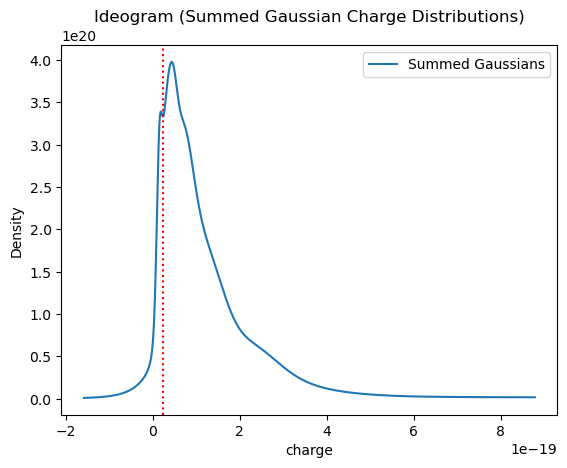

array([2.34295877e-20])

In [22]:
q, sigma_q = df["q"].to_numpy(), df["sigma_q"].to_numpy()
display(q)
ideogram(q, sigma_q)

331


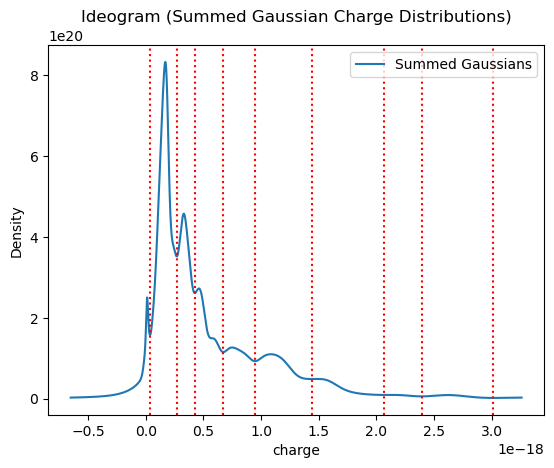

[3.63250981e-20 2.68320149e-19 4.24809222e-19 6.72844402e-19
 9.47482725e-19]


In [23]:
class_q, class_sigma_q = dl.load_class_charges("/home/lucas/repos/advanced_exp/Databases/combined_droplets_data.csv")
print(len(class_q))
min_x = ideogram(class_q, 1.3*class_sigma_q)
min_x = min_x[:5]
#min_x = np.insert(min_x, 0, 0)
print(min_x)

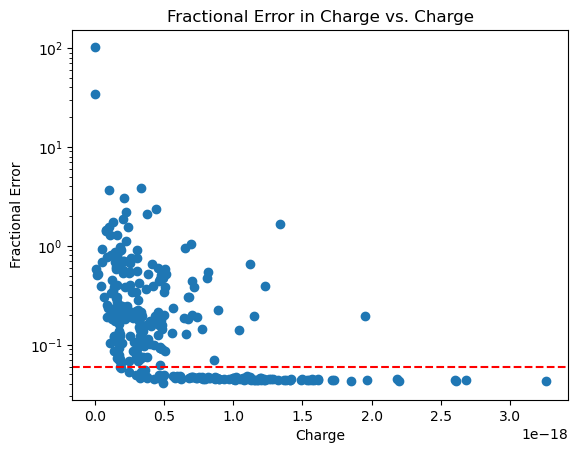

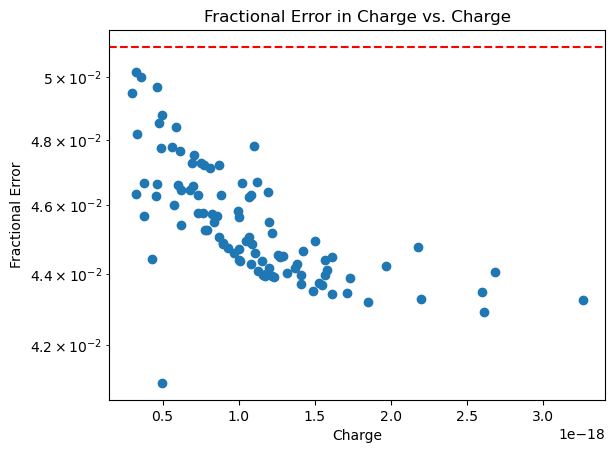

In [24]:
plot_fractional_error(class_q, class_sigma_q)
prune_class_q, prune_class_sigma_q = prune_data(class_q, class_sigma_q, 0.051)
plot_fractional_error(prune_class_q, prune_class_sigma_q, threshold=0.051)

   bin   mean_charge    sigma_mean
0  0.0  1.593046e-19  2.293525e-21
1  1.0  3.342715e-19  4.053292e-21
2  2.0  5.062083e-19  5.525821e-21
3  3.0  7.880279e-19  7.816964e-21


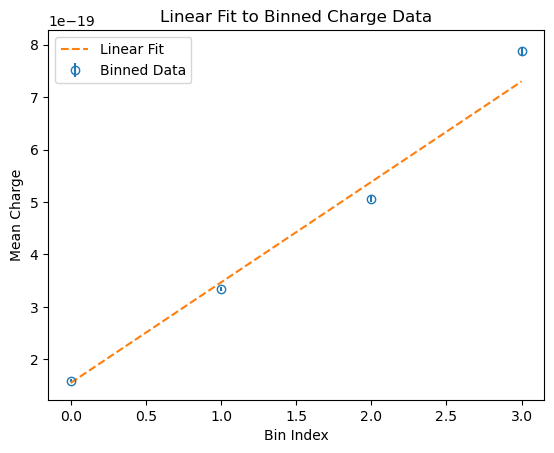

slope:1.9172100476524267e-19
 intercept:1.5483970944639113e-19
slope error:2.0560309477043998e-21
intercept error:2.1857684133040665e-21


In [25]:
binned_df = bin_charges(class_q, class_sigma_q, min_x)
#display(binned_df)
averages = weighted_average(binned_df)
print(averages)
slope, intercept, slope_error, intercept_error = linear_fit(averages)
plot_binned_data(averages, slope, intercept)
print("slope:" + str(slope))
print(" intercept:" + str(intercept))
print("slope error:" + str(slope_error))
print("intercept error:" + str(intercept_error))


390


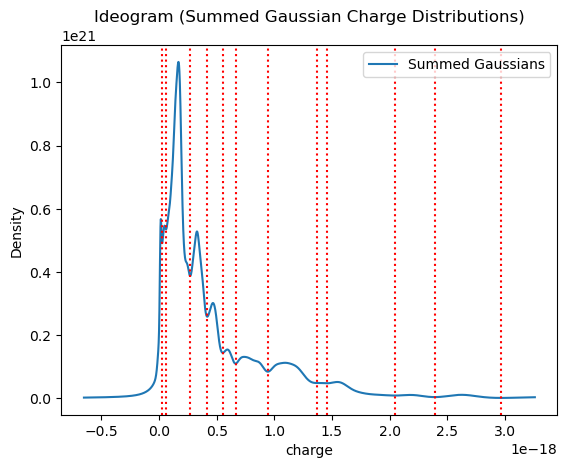

[6.01896817e-20 2.69885039e-19 4.17767213e-19 5.52347816e-19
 6.63455058e-19 9.43961721e-19]


In [26]:
total_q = np.concatenate((q, class_q))
total_sigma_q = np.concatenate((sigma_q, class_sigma_q))
print(len(total_q))
tot_min_x = ideogram(total_q, total_sigma_q)
tot_min_x = tot_min_x[1:7]
print(tot_min_x)

   bin   mean_charge    sigma_mean
0  0.0  1.496374e-19  2.094710e-21
1  1.0  3.338898e-19  4.040478e-21
2  2.0  4.685923e-19  6.547334e-21
3  3.0  5.979050e-19  1.033190e-20
4  4.0  7.874176e-19  7.792677e-21


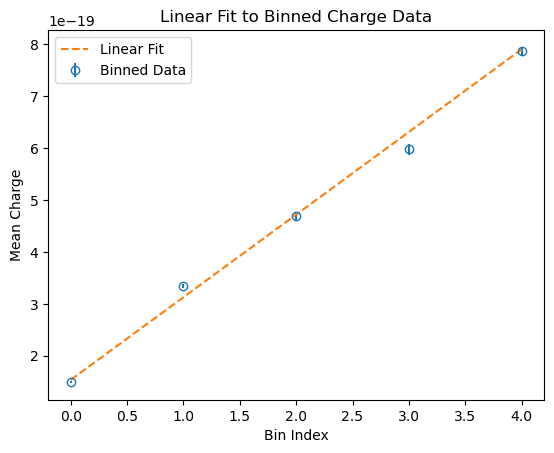

slope:1.5928268817123003e-19
 intercept:1.533976597067105e-19
slope error:1.6182007625099308e-21
intercept error:1.9718464710432877e-21


In [27]:
binned_df = bin_charges(total_q, total_sigma_q, tot_min_x)
pd.set_option("display.max_rows", None)
#display(binned_df)
averages = weighted_average(binned_df)
print(averages)
slope, intercept, slope_error, intercept_error = linear_fit(averages)
plot_binned_data(averages, slope, intercept)
print("slope:" + str(slope))
print(" intercept:" + str(intercept))
print("slope error:" + str(slope_error))
print("intercept error:" + str(intercept_error))


Gotta talk to sliwa. we can get a value similar to the known value by exclusion of points on both ends of the spectrum. however, while I do know why the values on the right may be excluded (there are not enough to be significant,) im not sure if it makes sense to ignore values to the left of the "knee" on the left side of the graph. 



He proposed filtering out bad points by removing based on fractional error. that is what i did below. 

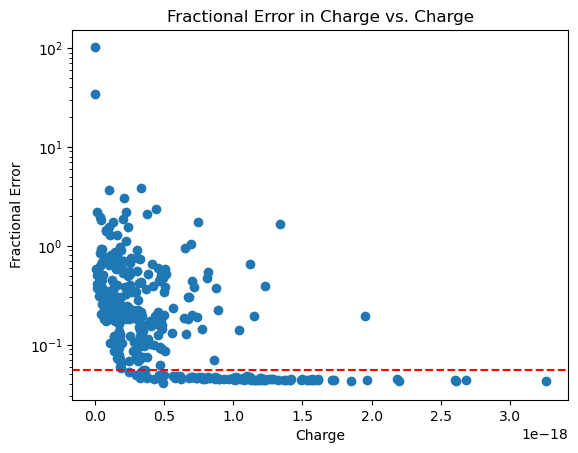

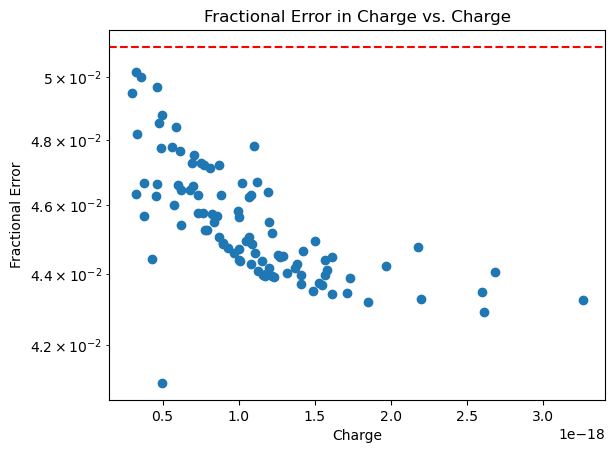

In [28]:
plot_fractional_error(total_q, total_sigma_q, threshold=0.055)
prune_total_q, prune_total_sigma_q = prune_data(total_q, total_sigma_q, 0.051)
plot_fractional_error(prune_total_q, prune_total_sigma_q, threshold=0.051)

98


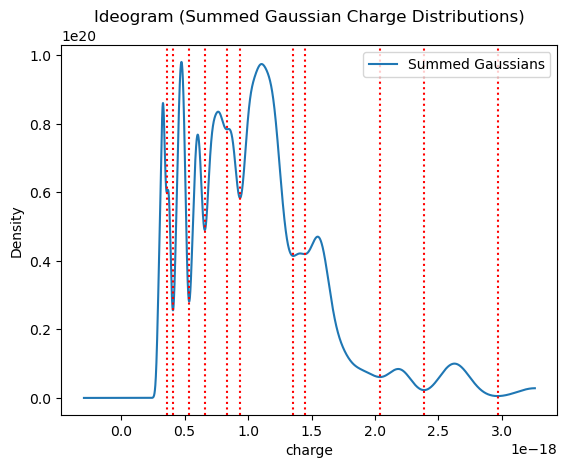

[0.00000000e+00 4.08271827e-19 5.35844464e-19 6.59152835e-19
 9.36685509e-19]


In [49]:
print(len(prune_total_q))
ptot_min_x = ideogram(prune_total_q, 1*prune_total_sigma_q)
ptot_min_x = np.concatenate((ptot_min_x[1:4], ptot_min_x[5:6]))
ptot_min_x = np.insert(ptot_min_x, 0, 0)
print(ptot_min_x)

,charge,sigma_charge,bin
0,1.000000e-18,4.470000e-20,NaN
1,1.130000e-18,4.980000e-20,NaN
2,1.410000e-18,6.160000e-20,NaN
3,1.850000e-18,7.990000e-20,NaN
4,6.150000e-19,2.930000e-20,2.0
5,4.960000e-19,2.420000e-20,1.0
6,1.180000e-18,5.190000e-20,NaN
7,1.420000e-18,6.340000e-20,NaN
8,9.690000e-19,4.320000e-20,NaN
9,5.610000e-19,2.680000e-20,2.0


   bin   mean_charge    sigma_mean
0  0.0  3.389954e-19  6.168433e-21
1  1.0  4.689353e-19  7.700572e-21
2  2.0  5.977343e-19  1.059642e-20
3  3.0  7.874383e-19  7.949409e-21


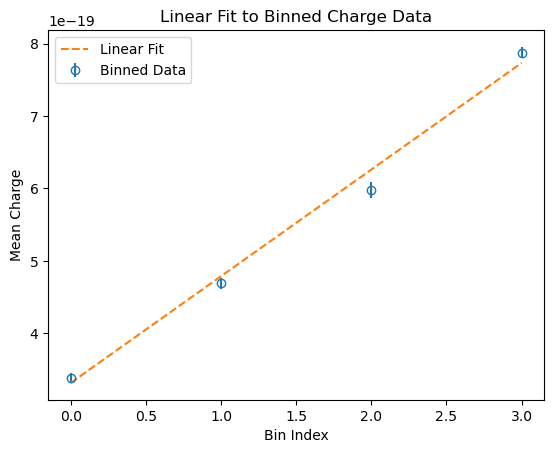

slope:1.4724396860662846e-19
 intercept:3.3157016917064276e-19
slope error:3.2361954079753555e-21
intercept error:5.4839385443001346e-21


In [52]:
binned_df = bin_charges(prune_total_q, prune_total_sigma_q, ptot_min_x)
pd.set_option("display.max_rows", None)
display(binned_df)
averages = weighted_average(binned_df)
print(averages)
slope, intercept, slope_error, intercept_error = linear_fit(averages)
plot_binned_data(averages, slope, intercept)
print("slope:" + str(slope))
print(" intercept:" + str(intercept))
print("slope error:" + str(slope_error))
print("intercept error:" + str(intercept_error))